## Script to calculate average grade

### Enter the path to your `.html` file here

In [1]:
path = './grades_ger.html'

### Run the cells below


In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
with open(path, 'r') as file:
    table = pd.read_html(file)
try:
    grades = table[4] 
except IndexError:
    print('Index error, changing index from 4 to 3')
    grades = table[3]


grades.columns = grades.columns.droplevel(1)
grades.columns = ['id', 'course', 'sess', 'grade', 'category', 'weight', 'soll', 'miss']

mask = pd.isna(grades['category']) #only select rows containing course data
grades.drop(columns=['soll', 'miss', 'category'], inplace=True)
grades = grades[mask]

mask2 = (grades['grade'] == 'pass') | (grades['grade'] == 'Best')
grades = grades[~mask2]

#cange datatype
grades['grade'] = grades['grade'].astype('float')
grades['sess'] = grades['sess'].astype('category')

#make copy as backup 
cgrades = grades.copy()

Index error, changing index from 4 to 3


### Add another potential grade 
Adjust `grade`, `name` and `weight` accordingly. This cell can be run multiple times to add more than one grade. Courses with `weight` equal to zero will be ignored.

In [4]:
#add potential grade/thesis whatever
grade = 5.5
name = 'master thesis'
weight = 0
if weight != 0:
    new_grade = pd.Series({'id': 'placeholder', 'course': name, 'sess': 'egal', 'grade': grade, 'weight': weight})
    grades = grades.append(new_grade, ignore_index=True)

If you have to reset you grades, uncomment the line below and run the cell. You can also manualy modify the dataframe to fit your purpose at any time in the script!

In [5]:
#reset your grades if you made a mistake
#grades = cgrades.copy()

### List of your grades
The grades below will be used to calculate average

In [6]:
grades

,id,course,sess,grade,weight
5,227-0434-10 S,Mathematics of Information,S19,5.50,8
6,227-0423-00 S,Neural Network Theory,S20,6.00,4
8,401-3621-00 S,Fundamentals of Mathematical Statistics,W19,5.75,10
10,263-3010-00 S,Big Data,W20,5.00,8
11,261-5110-00 S,Optimization for Data Science,S19,5.25,8
13,401-3627-00 S,High-Dimensional Statistics,S20,5.25,4
14,MOB-003,Numerical Optimization / University of Copenhagen,S18,5.50,7
15,401-3601-00 S,Probability Theory,S18,5.50,10
16,263-2400-00 S,Reliable and Interpretable Artificial Intellig...,W20,5.00,5
18,401-4788-16 S,Mathematics of (Super-Resolution) Biomedical I...,S19,6.00,8


### Calculate and print results

In [7]:
#calculate average and other statistics:

dot = grades['grade'].dot(grades['weight'])
sum = grades['weight'].sum()
avg = dot/sum
median = grades.grade.median()
min = grades.grade.min()
max = grades.grade.max()

print('obtained credits: {}'.format(sum))
print('average grade: {:.3f}'.format(avg))
print('median grade: {}'.format(median))
print('lowest grade: {}'.format(min))
print('highest grade: {}'.format(max))

obtained credits: 78
average grade: 5.487
median grade: 5.5
lowest grade: 5.0
highest grade: 6.0


### Histogram of obtained grades

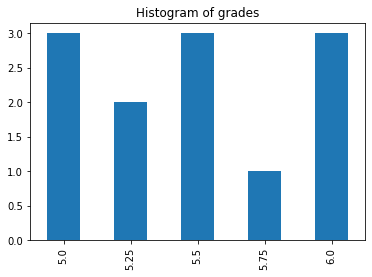

In [10]:
#create histogram of grades. If plot doesn't show, run cell again!
plt = grades.grade.sort_values().value_counts(sort=False).plot(kind='bar', title='Histogram of grades')
plt